<a href="https://colab.research.google.com/github/zqiaohe/100daysofcode/blob/master/Correlation_and_P_value.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
np.random.seed(123)

In [0]:
train = pd.read_csv('drive/My Drive/СupIT_final/train.csv', sep='\t')
test = pd.read_csv('drive/My Drive/СupIT_final/test.csv', sep='\t')
services = pd.read_csv('drive/My Drive/СupIT_final/services.csv', sep='\t')

In [0]:
df = pd.read_csv('drive/My Drive/СupIT_final/features.csv', sep='\t', nrows = 50000)

In [0]:
df = train.merge(df, left_on='id', right_on='id')

In [115]:
train_df.shape

(41453, 259)

In [0]:
df = df.drop(['Unnamed: 0'], axis=1)

In [119]:
df.head()

,id,vas_id,buy_time_x,target,buy_time_y,0,1,2,3,4,...,243,244,245,246,247,248,249,250,251,252
0,1979749,2.0,1533502800,0.0,1542574800,-63.759971,-242.989112,-68.810786,-260.036798,-74.228246,...,-977.373846,-613.770792,-25.996269,-37.630448,-306.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0
1,2634750,6.0,1544389200,1.0,1544389200,-96.799971,-71.309112,-85.320786,-95.496798,-90.738246,...,-977.373846,-613.770792,-25.996269,-36.630448,-256.747724,-23.832889,-0.694428,-12.175933,-0.45614,0.0
2,2871863,1.0,1537131600,0.0,1537131600,23.340029,58.970888,106.699214,144.763202,101.281754,...,-977.373846,-613.770792,-25.996269,-37.630448,-306.747724,-25.832889,-0.694428,-12.175933,-0.45614,1.0
3,1456385,4.0,1540155600,0.0,1546203600,-96.799971,-86.559112,-51.910786,-50.676798,-57.328246,...,-406.373846,-187.770792,-20.996269,-37.630448,57.252276,-20.832889,-0.694428,-12.175933,-0.45614,0.0
4,362327,1.0,1539550800,0.0,1534107600,-86.629971,121.060888,29.059214,842.853202,23.641754,...,-970.373846,-613.770792,-25.996269,-36.630448,-273.747724,-3.832889,-0.694428,9.824067,-0.45614,0.0


##Корреляция 

In [0]:
corr = df.corr()

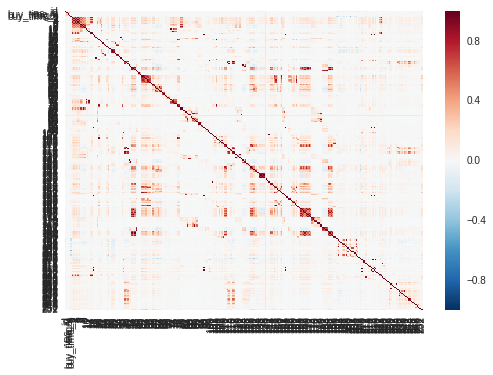

In [121]:
sns.heatmap(corr)

In [92]:
df.shape

(41453, 258)

In [122]:
df.head()

,id,vas_id,buy_time_x,target,buy_time_y,0,1,2,3,4,...,243,244,245,246,247,248,249,250,251,252
0,1979749,2.0,1533502800,0.0,1542574800,-63.759971,-242.989112,-68.810786,-260.036798,-74.228246,...,-977.373846,-613.770792,-25.996269,-37.630448,-306.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0
1,2634750,6.0,1544389200,1.0,1544389200,-96.799971,-71.309112,-85.320786,-95.496798,-90.738246,...,-977.373846,-613.770792,-25.996269,-36.630448,-256.747724,-23.832889,-0.694428,-12.175933,-0.45614,0.0
2,2871863,1.0,1537131600,0.0,1537131600,23.340029,58.970888,106.699214,144.763202,101.281754,...,-977.373846,-613.770792,-25.996269,-37.630448,-306.747724,-25.832889,-0.694428,-12.175933,-0.45614,1.0
3,1456385,4.0,1540155600,0.0,1546203600,-96.799971,-86.559112,-51.910786,-50.676798,-57.328246,...,-406.373846,-187.770792,-20.996269,-37.630448,57.252276,-20.832889,-0.694428,-12.175933,-0.45614,0.0
4,362327,1.0,1539550800,0.0,1534107600,-86.629971,121.060888,29.059214,842.853202,23.641754,...,-970.373846,-613.770792,-25.996269,-36.630448,-273.747724,-3.832889,-0.694428,9.824067,-0.45614,0.0


In [0]:
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = df.columns[columns]
df = df[selected_columns]

In [0]:
df0 = df.drop(['target'], axis=1)

In [125]:
df0.head()

,id,vas_id,buy_time_x,buy_time_y,0,1,6,7,8,9,...,243,244,245,246,247,248,249,250,251,252
0,1979749,2.0,1533502800,1542574800,-63.759971,-242.989112,9.33382,23.893903,-6.783660,-30.006538,...,-977.373846,-613.770792,-25.996269,-37.630448,-306.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0
1,2634750,6.0,1544389200,1544389200,-96.799971,-71.309112,-16.08618,-65.076097,-6.783660,-30.006538,...,-977.373846,-613.770792,-25.996269,-36.630448,-256.747724,-23.832889,-0.694428,-12.175933,-0.45614,0.0
2,2871863,1.0,1537131600,1537131600,23.340029,58.970888,-16.08618,-65.076097,-6.783660,-30.006538,...,-977.373846,-613.770792,-25.996269,-37.630448,-306.747724,-25.832889,-0.694428,-12.175933,-0.45614,1.0
3,1456385,4.0,1540155600,1546203600,-96.799971,-86.559112,-16.08618,-65.076097,-6.783660,-30.006538,...,-406.373846,-187.770792,-20.996269,-37.630448,57.252276,-20.832889,-0.694428,-12.175933,-0.45614,0.0
4,362327,1.0,1539550800,1534107600,-86.629971,121.060888,-10.15618,-59.146097,-6.544098,-29.766976,...,-970.373846,-613.770792,-25.996269,-36.630448,-273.747724,-3.832889,-0.694428,9.824067,-0.45614,0.0


In [126]:
selected_columns

Index(['id', 'vas_id', 'buy_time_x', 'target', 'buy_time_y', '0', '1', '6',
       '7', '8',
       ...
       '243', '244', '245', '246', '247', '248', '249', '250', '251', '252'],
      dtype='object', length=222)

In [130]:
selected_columns.values

array(['id', 'vas_id', 'buy_time_x', 'target', 'buy_time_y', '0', '1',
       '6', '7', '8', '9', '10', '11', '12', '13', '15', '16', '17', '18',
       '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29',
       '30', '31', '32', '33', '34', '36', '37', '38', '39', '40', '41',
       '42', '43', '44', '46', '47', '48', '49', '50', '52', '53', '54',
       '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65',
       '66', '67', '68', '69', '70', '73', '74', '75', '76', '77', '78',
       '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90',
       '91', '93', '94', '96', '97', '98', '99', '100', '101', '102',
       '103', '105', '106', '107', '108', '109', '110', '111', '114',
       '115', '117', '118', '119', '120', '122', '125', '126', '127',
       '128', '129', '130', '131', '132', '133', '134', '135', '136',
       '139', '140', '141', '143', '144', '145', '146', '147', '148',
       '149', '150', '151', '152', '153', '155', '156', '157', '15

In [0]:
k = selected_columns.values 

In [136]:
np.delete(k, 3)

array(['id', 'vas_id', 'buy_time_x', 'buy_time_y', '0', '1', '6', '7',
       '8', '9', '10', '11', '12', '13', '15', '16', '17', '18', '19',
       '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30',
       '31', '32', '33', '34', '36', '37', '38', '39', '40', '41', '42',
       '43', '44', '46', '47', '48', '49', '50', '52', '53', '54', '55',
       '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66',
       '67', '68', '69', '70', '73', '74', '75', '76', '77', '78', '80',
       '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91',
       '93', '94', '96', '97', '98', '99', '100', '101', '102', '103',
       '105', '106', '107', '108', '109', '110', '111', '114', '115',
       '117', '118', '119', '120', '122', '125', '126', '127', '128',
       '129', '130', '131', '132', '133', '134', '135', '136', '139',
       '140', '141', '143', '144', '145', '146', '147', '148', '149',
       '150', '151', '152', '153', '155', '156', '157', '158', '159',

In [0]:
k = np.delete(k, 3)

In [0]:
Y = df.iloc[:,3]

In [140]:
Y.head()

0    0.0
1    1.0
2    0.0
3    0.0
4    0.0
Name: target, dtype: float64

##P-value

In [0]:
selected_columns = k
import statsmodels.formula.api as sm
def backwardElimination(x, Y, sl, columns):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(Y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
                    columns = np.delete(columns, j)
                    
    regressor_OLS.summary()
    return x, columns
SL = 0.08
data_modeled, selected_columns = backwardElimination(df0.iloc[:,:].values, df.iloc[:,3].values, SL, selected_columns)

In [0]:
result = pd.DataFrame()
result['preds'] = df.iloc[:,3]

In [0]:
data = pd.DataFrame(data = data_modeled, columns = selected_columns)

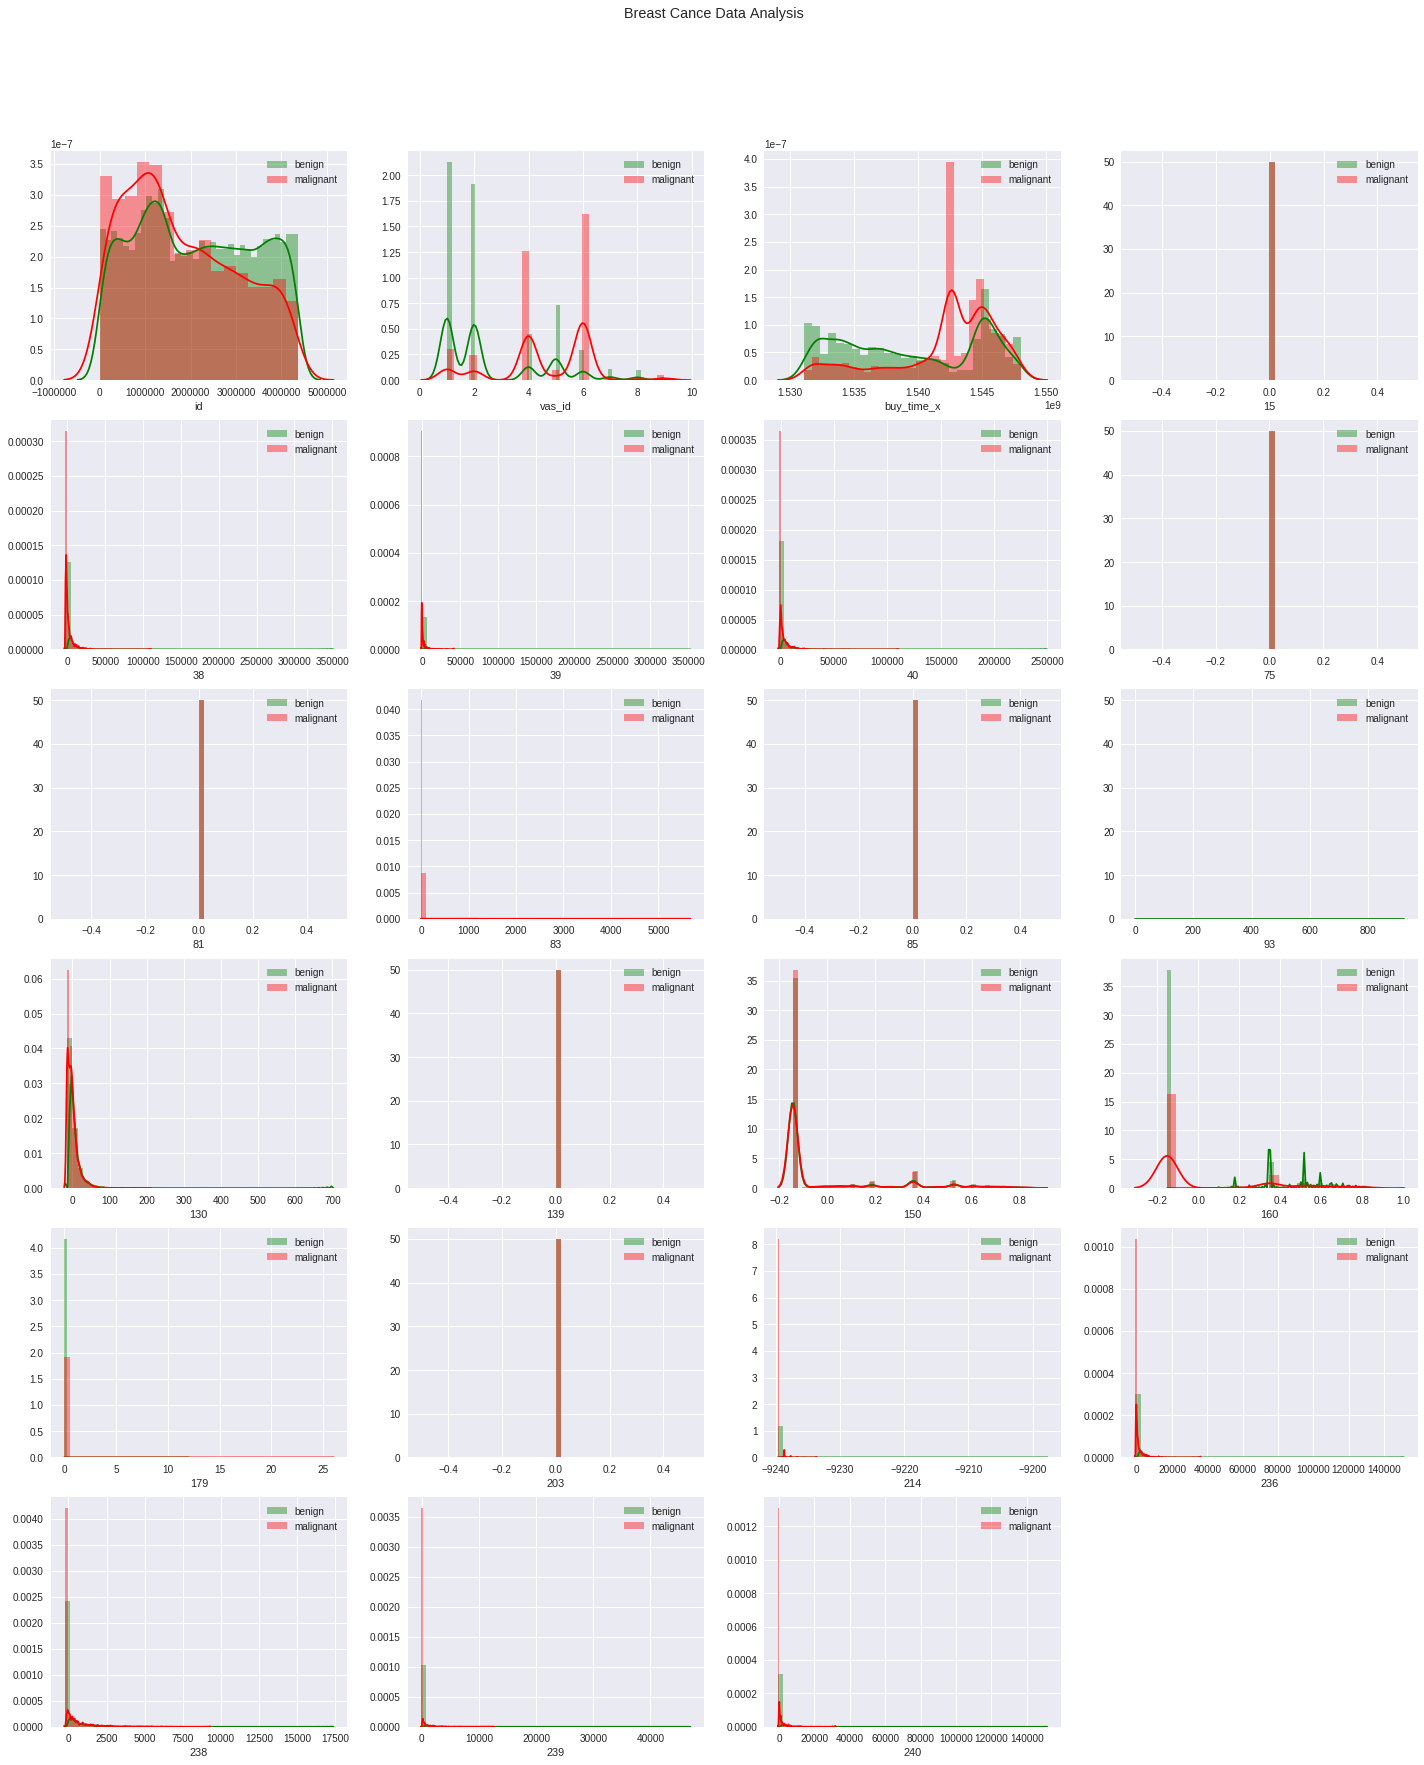

In [153]:
fig = plt.figure(figsize = (20, 25))
j = 0
for i in data.columns:
    plt.subplot(6, 4, j+1)
    j += 1
    sns.distplot(data[i][result['preds']==0], color='g', label = 'benign')
    sns.distplot(data[i][result['preds']==1], color='r', label = 'malignant')
    plt.legend(loc='best')
fig.suptitle('Breast Cance Data Analysis')
fig.tight_layout()
fig.subplots_adjust(top=0.9)
plt.show()

In [0]:
fields = selected_columns
#['id', 'vas_id', 'buy_time_x', '15', '38', '39', '40', '75', '81',
       '83', '85', '93', '130', '139', '150', '160', '179', '203', '214',
       '236', '238', '239', '240']

In [156]:
selected_columns

array(['id', 'vas_id', 'buy_time_x', '15', '81', '83', '130', '150',
       '160', '179', '203', '214'], dtype=object)